<a href="https://colab.research.google.com/github/Viatcheslav1991/PROJECT-4.-/blob/main/Project_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект: классификация

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

import statistics

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.2 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

In [ ]:
from sklearn.feature_selection import RFE
import optuna

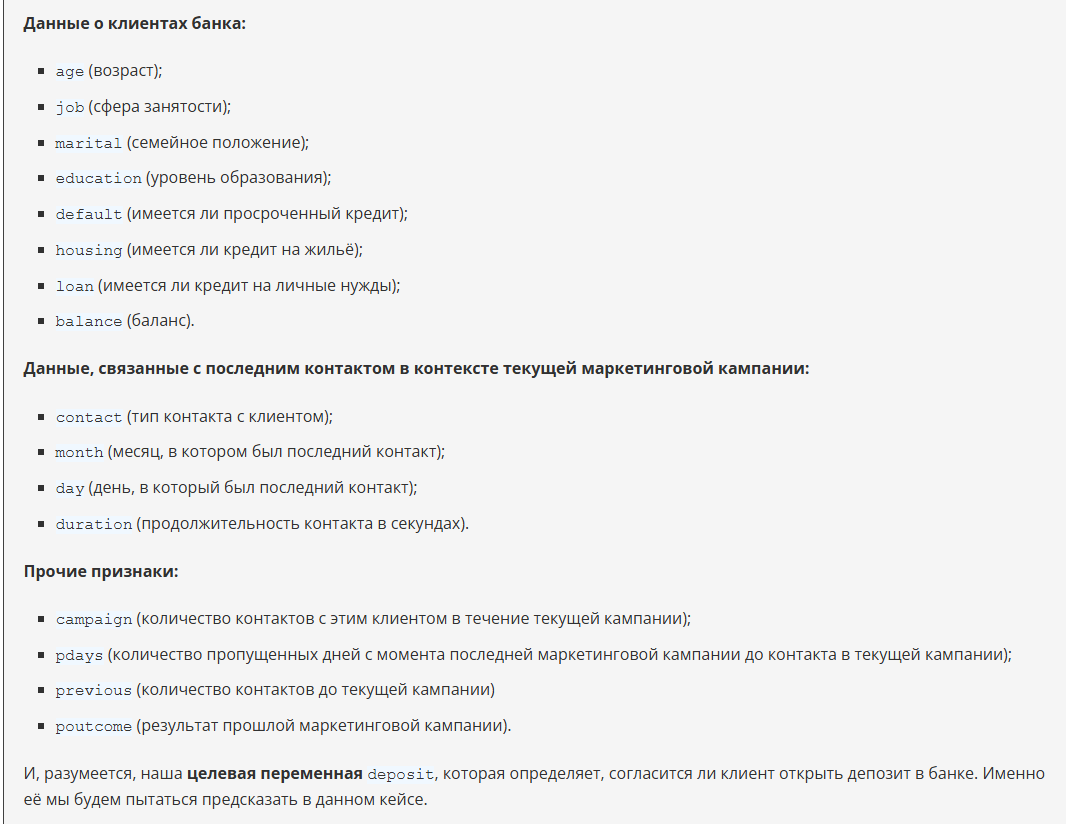

In [ ]:
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SkilFactory/Блок 4. Введение в машинное обучение/PROJECT-4. Задача классификации/bank_fin/bank_fin.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [ ]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,25
housing,0
loan,0
contact,0
day,0


### Задание 2

In [ ]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
df[["job"]].value_counts()

,count
job,
management,2566
blue-collar,1944
technician,1823
admin.,1334
services,923
retired,778
self-employed,405
student,360
unemployed,357


In [ ]:
df.describe()

,age,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Задание 3

In [ ]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df["balance"]=df["balance"].astype(str)
df["balance"]=df["balance"].apply(lambda X :  X.replace(" ","").replace(",",".").replace("$",""))

df["balance"]=df["balance"].astype(float)

In [ ]:
print("Найдём среднее арефметическое ",df["balance"].mean())

Найдём среднее арефметическое  1529.1290293615875


### Задание 4

In [ ]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
df["balance"]=df["balance"].fillna(df["balance"].median())

In [ ]:
print("Найдём среднее арефметическое ",df["balance"].mean())

Найдём среднее арефметическое  1526.9360329690019


### Задание 5

In [ ]:
# Запись значений в столбец по индексам (тут заполняются яцейки пустыми значениями )
df.loc[df[df["education"]=="unknown"].index,"education"]=np.nan
df.loc[df[df["job"]=="unknown"].index,"job"]=np.nan

In [ ]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
values={"job":df["job"].mode()[0],  "education":df["education"].mode()[0]}

df.fillna(value=values,inplace=True)

После замены пропусков рассчитайте средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования (т. е. для тех, у кого одновременно самая популярная работа и самое популярное образование). Ответ округлите до трёх знаков после точки-разделителя.

In [ ]:
mask=(df["job"]==df["job"].mode()[0])&(df["education"]==df["education"].mode()[0])
df[mask]["balance"].mean()

1598.8829787234042

### Задание 6

Text(0, 0.5, 'Количество')

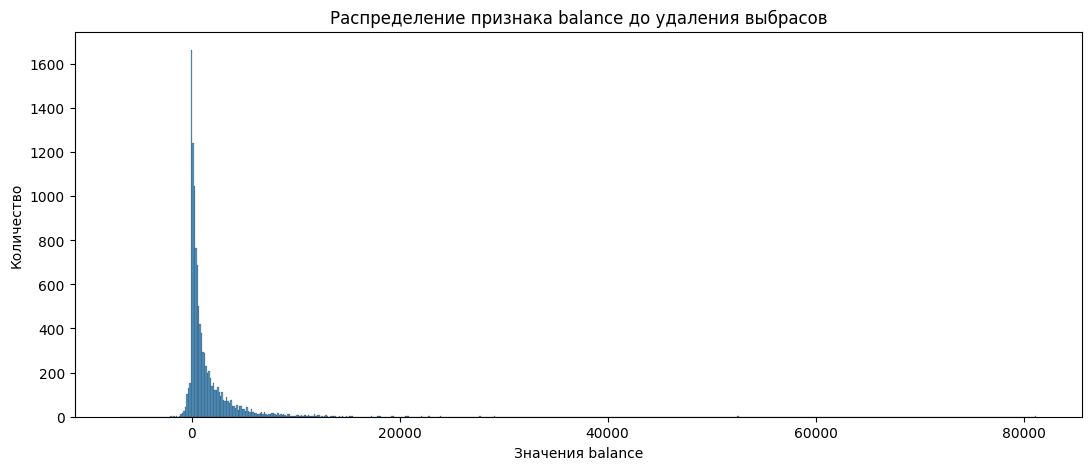

In [ ]:
fig,ax=plt.subplots(figsize=(13,5))

sns.histplot(data=df,x="balance")

ax.set_title("Распределение признака balance до удаления выбрасов")
ax.set_xlabel("Значения balance")
ax.set_ylabel("Количество")

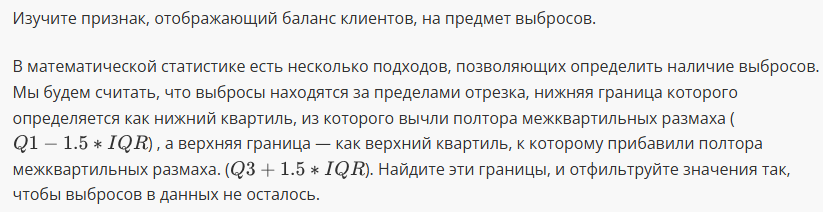

In [ ]:
# поиск выбрасов
def find_emissions(df:pd.DataFrame,collname:str,r_coef=1.5,l_coef=1.5):
  # Надём межквантильный размех
  IQR=df[collname].quantile(0.75)-df[collname].quantile(0.25)
  # Найдём границы
  L_value=df[collname].quantile(0.25)-l_coef*IQR
  R_value=df[collname].quantile(0.75)+r_coef*IQR

  # Создадим списки с индексами выбрасов и не выбросов
  list_index_emissions=(df[collname]>R_value)|((df[collname]<L_value))

  list_index_NOT_emissions=(df[collname]<=R_value)&((df[collname]>=L_value))

  print( "Границы межквантильного размаха ",L_value,R_value)
  return list_index_emissions,list_index_NOT_emissions

In [ ]:
df=df[find_emissions(df,"balance")[1]]

Границы межквантильного размаха  -2241.0 4063.0


Text(0, 0.5, 'Количество')

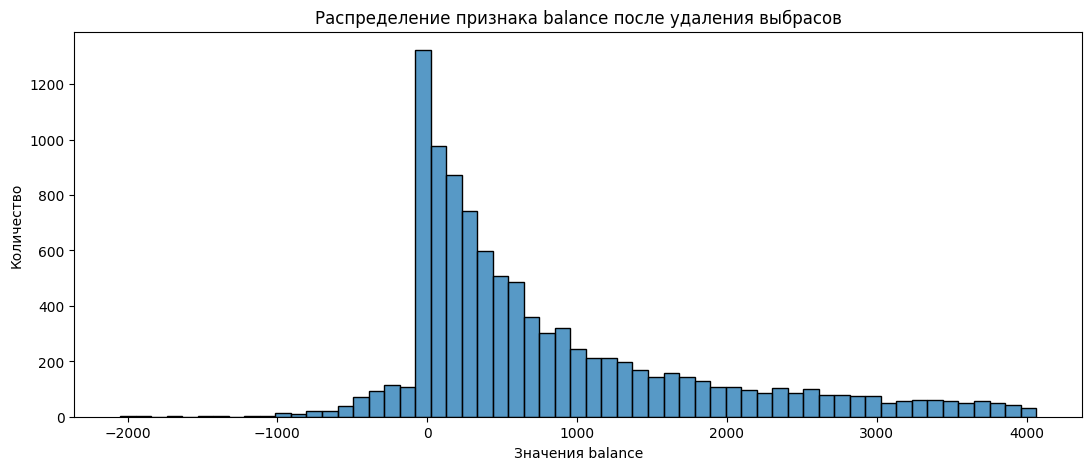

In [ ]:
fig,ax=plt.subplots(figsize=(13,5))

sns.histplot(data=df,x="balance")

ax.set_title("Распределение признака balance после удаления выбрасов")
ax.set_xlabel("Значения balance")
ax.set_ylabel("Количество")

## Часть 2:  Разведывательный анализ

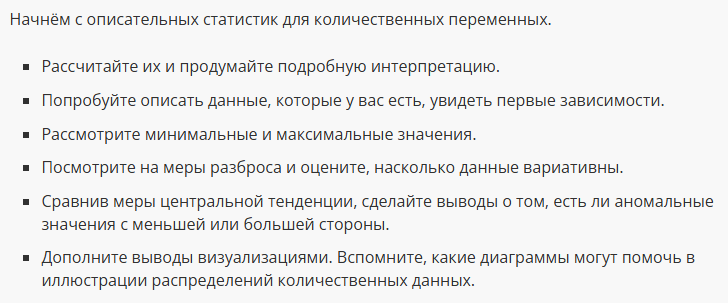

### Задание 1

<Axes: xlabel='deposit', ylabel='Count'>

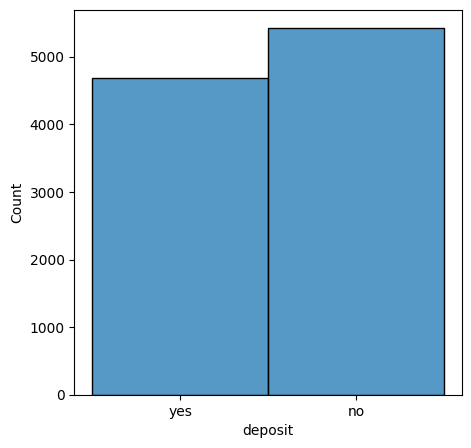

In [ ]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код
df["deposit"].value_counts()

fig,ax=plt.subplots(figsize=(5,5))

sns.histplot(data=df,x="deposit")

In [ ]:
# Сколько клиентов открыли депозит?
df.groupby(by=["deposit"])["marital"].count()["yes"]

4681

In [ ]:
# Каков максимальный возраст клиента банка?
print("Максимальный возраст клиента банка ",df["age"].max())

Максимальный возраст клиента банка  95


Text(0.5, 1.0, 'Гистограмма распределения возрастов с указанием статуса открытия депозита')

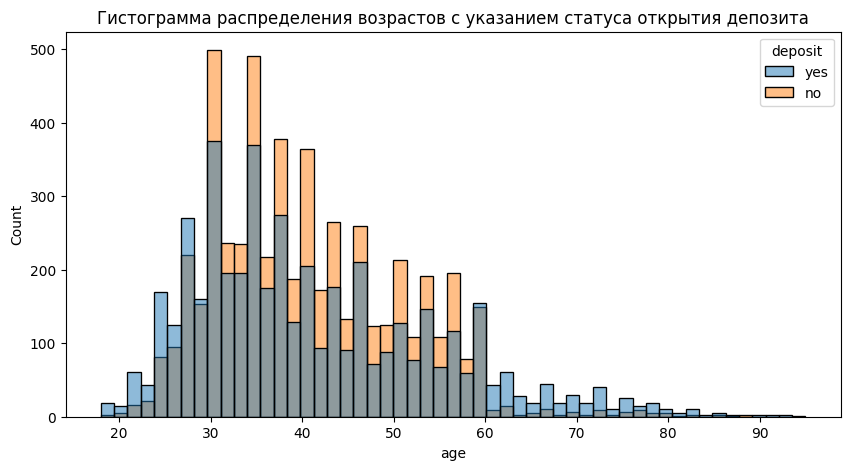

In [ ]:

fig,ax=plt.subplots(figsize=(10,5))

sns.histplot(data=df,x="age",hue="deposit")
ax.set_title("Гистограмма распределения возрастов с указанием статуса открытия депозита")

### Задания 2 и 3

In [ ]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
df.describe(include="number")


,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


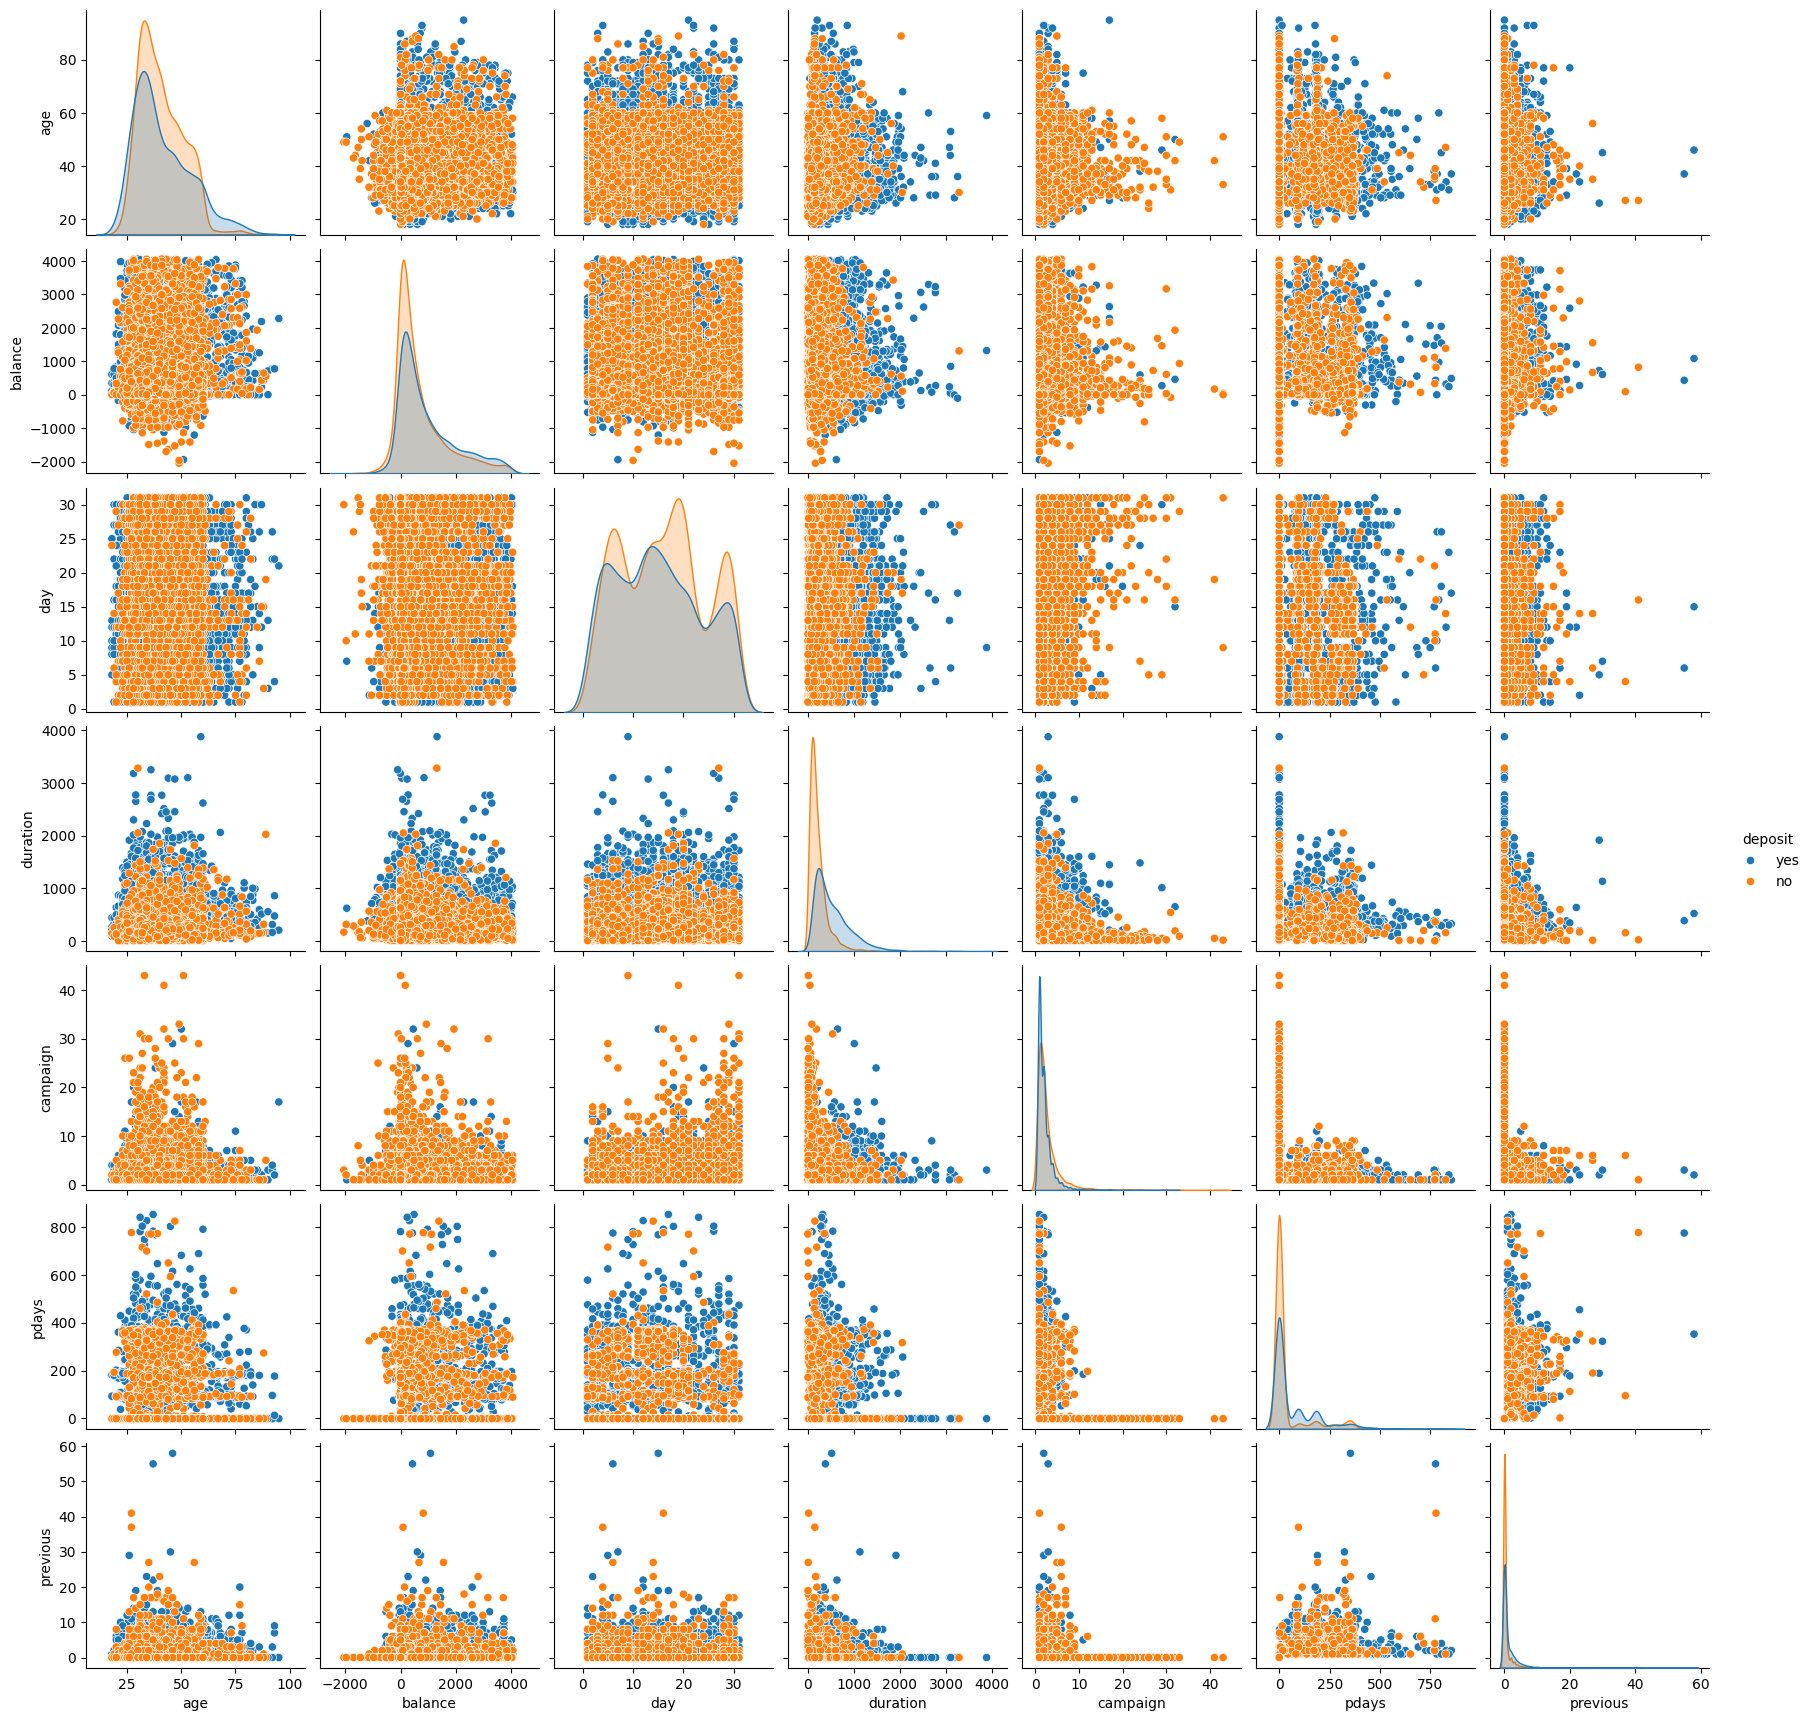

In [ ]:
sns.pairplot(data=df,hue="deposit")

age- судя по Гистограммам и статистическим параметрам признак не имеет больших выбрасов  распределение имеет явный максимум возможно его можно сделать нормальным  

balance - выбрасы есть но их нзачение не велико (вывод сделан по значениям 3ей квантили и максимального значения ) ,распредление имеет явный максимум распределён широко

day - выбрасов нет ,распредление имеет явный максимум распределён широко

duration - есть выбрасы.  очень  крутое распределение, люди которые не открыли депозит восносном не желали вести диалоги . Люди которые завели депозит охотние шли на контакт

campaign	- есть выбросы  . Явной разницы между людьми которые хотели завести депозит и не завели депозит не наблюдается .

pdays -есть выбросы . Нет особой разницы в распределении . Для тех кто открыл депозит и не открыл . Значения восносном  около 0

previous -есть выбросы  . Значения восновном около нуля


<Axes: >

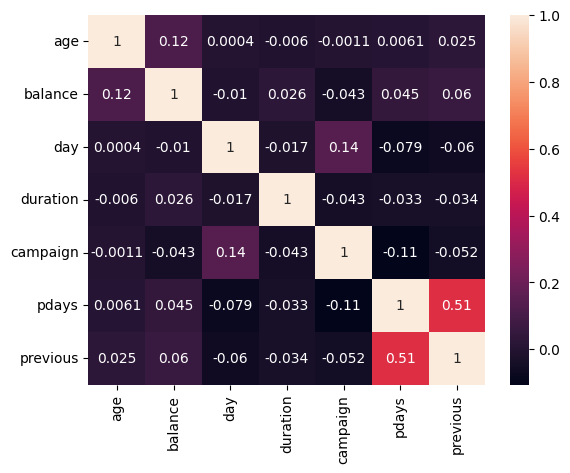

In [ ]:
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True)

### Задания 4 и 5

In [ ]:
df.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


<Axes: xlabel='month', ylabel='Count'>

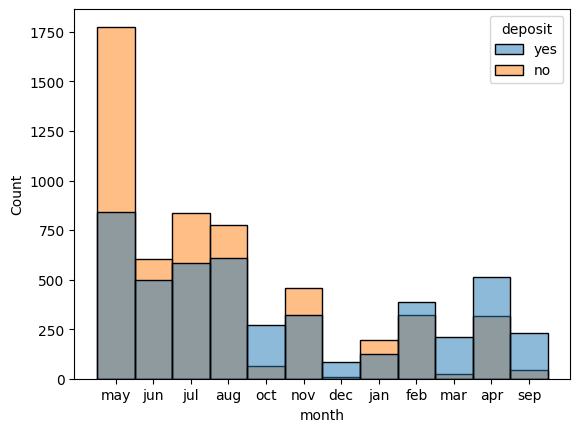

In [ ]:
# Сколько было месяцев, в которых проводилась маркетинговая кампания

sns.histplot(data=df,x="month",hue="deposit")

<Axes: xlabel='job', ylabel='Count'>

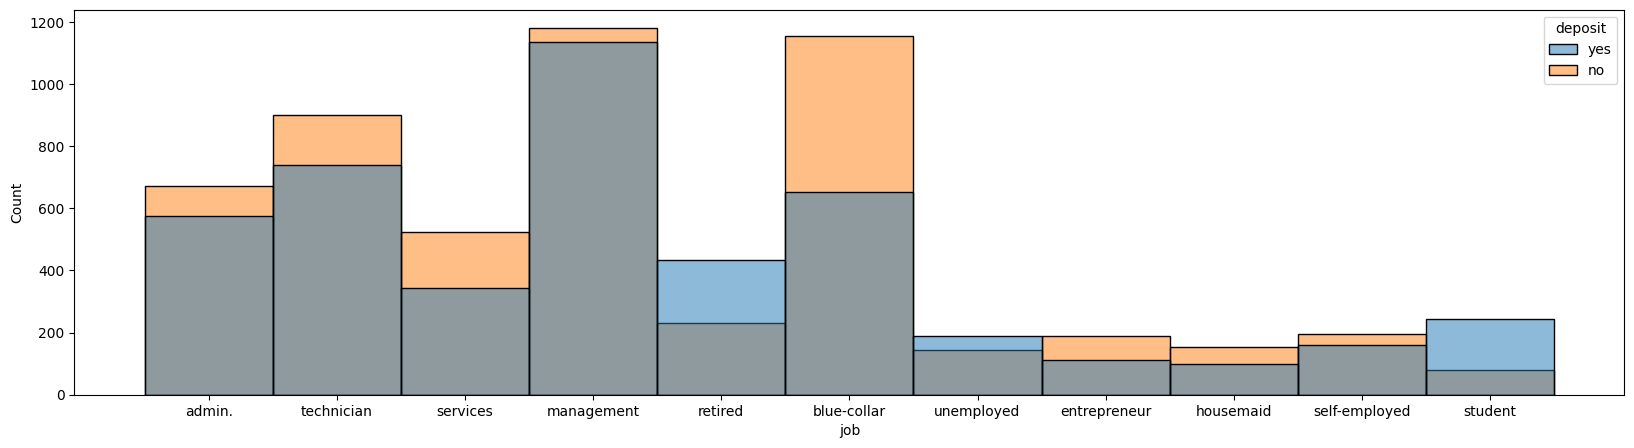

In [ ]:
# Сколько сфер занятости представлено среди клиентов банка
fig,ax=plt.subplots(figsize=(20,5))
sns.histplot(data=df,x="job",hue="deposit")

### Задание 6

In [ ]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
df["poutcome"].value_counts()

,count
poutcome,
unknown,7570
failure,1109
success,945
other,481


<Axes: xlabel='poutcome', ylabel='Count'>

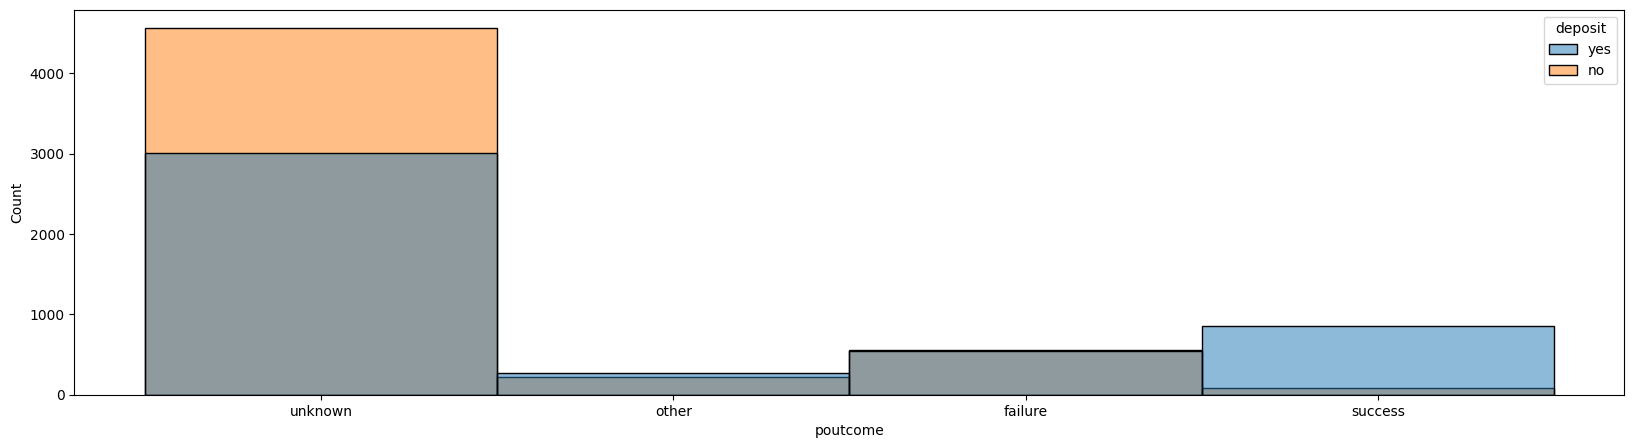

In [ ]:
fig,ax=plt.subplots(figsize=(20,5))
sns.histplot(data=df,x="poutcome",hue="deposit")

### Задание 7

Text(0, 0.5, '%')

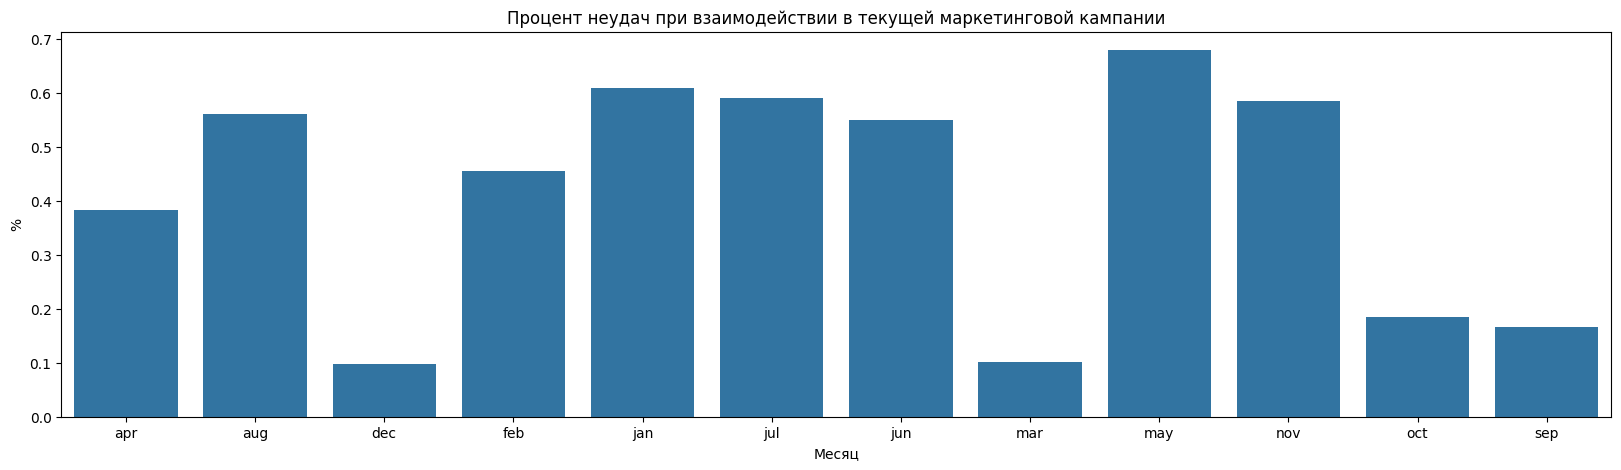

In [ ]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит

# Найдём полное количество клиентов в каждом месяце
series_sum_deposit=df.groupby(by=["month"]).count()["age"]

# Найдём полное отказов в каждом месяце
series_sum_deposit_fail=df[df["deposit"]=="no"]
series_sum_deposit_fail=series_sum_deposit_fail.groupby(by=["month"]).count()["job"]


# отбьединим столбцы
df_itog=pd.DataFrame([series_sum_deposit,series_sum_deposit_fail]).T

# Получим соотношение неудач к общему количеству действий
df_itog["Result"]=df_itog["job"]/df_itog["age"]
df_itog.sort_values(by=["Result"])

# нарисуем график
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data=df_itog,x=df_itog.index, y=df_itog["Result"]  )
ax.set_title("Процент неудач при взаимодействии в текущей маркетинговой кампании")
ax.set_xlabel("Месяц")
ax.set_ylabel("%")

### Задание 8

In [ ]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения

In [ ]:
# Создадим возрастные группы
def add_age_group(age:int):
  if age<30:
    return '<30'
  if age>=30 and age<40:
    return '30-40'
  if age>=40 and age<50:
    return '40-50'

  if age>=50 and age<60:
    return '50-60'

  if age>=60:
    return '60+'


In [ ]:
df["Group_Age"]=df["age"].apply(add_age_group)

<Axes: xlabel='Group_Age', ylabel='Count'>

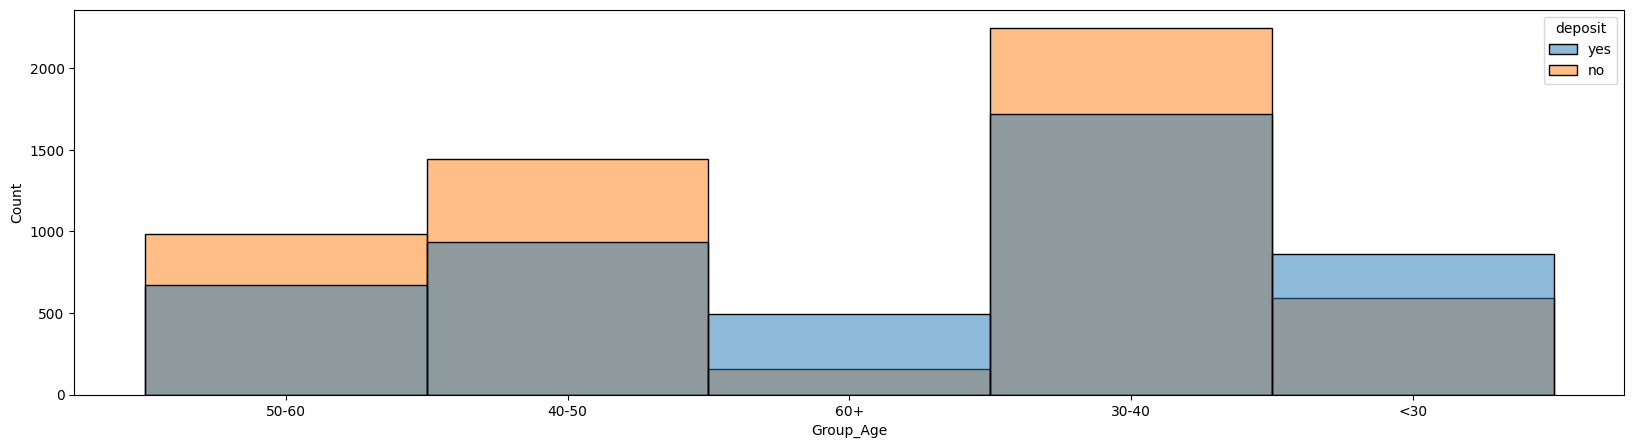

In [ ]:
fig,ax=plt.subplots(figsize=(20,5))
sns.histplot(data=df,x="Group_Age",hue="deposit")

### Задания 9 и 10

<Axes: xlabel='marital', ylabel='Count'>

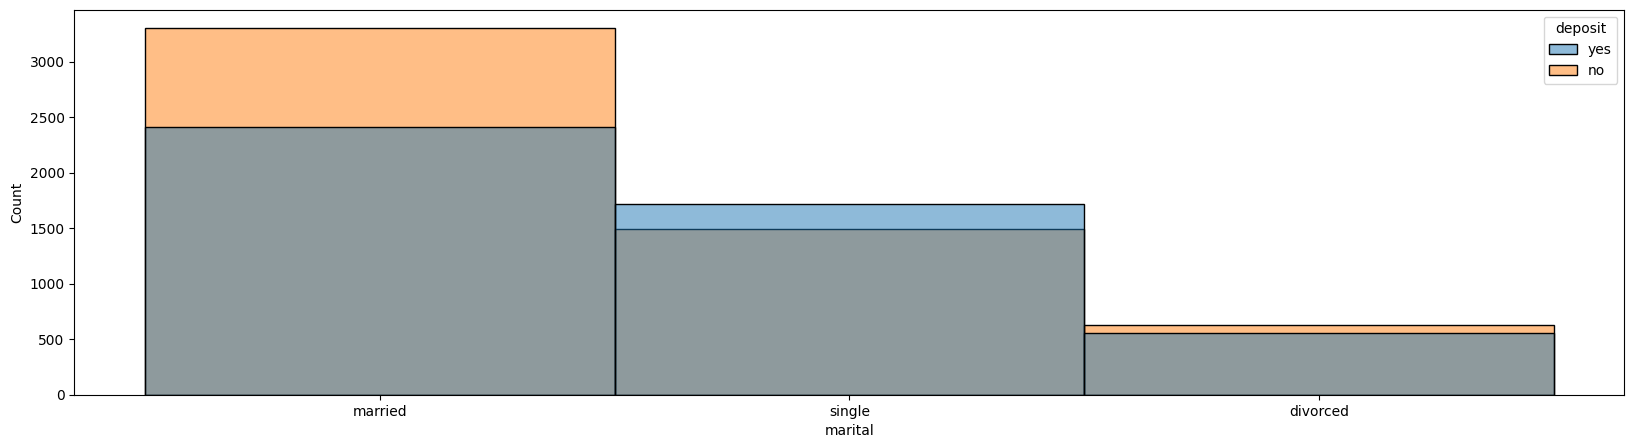

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
fig,ax=plt.subplots(figsize=(20,5))
sns.histplot(data=df,x="marital",hue="deposit")

<Axes: xlabel='education', ylabel='Count'>

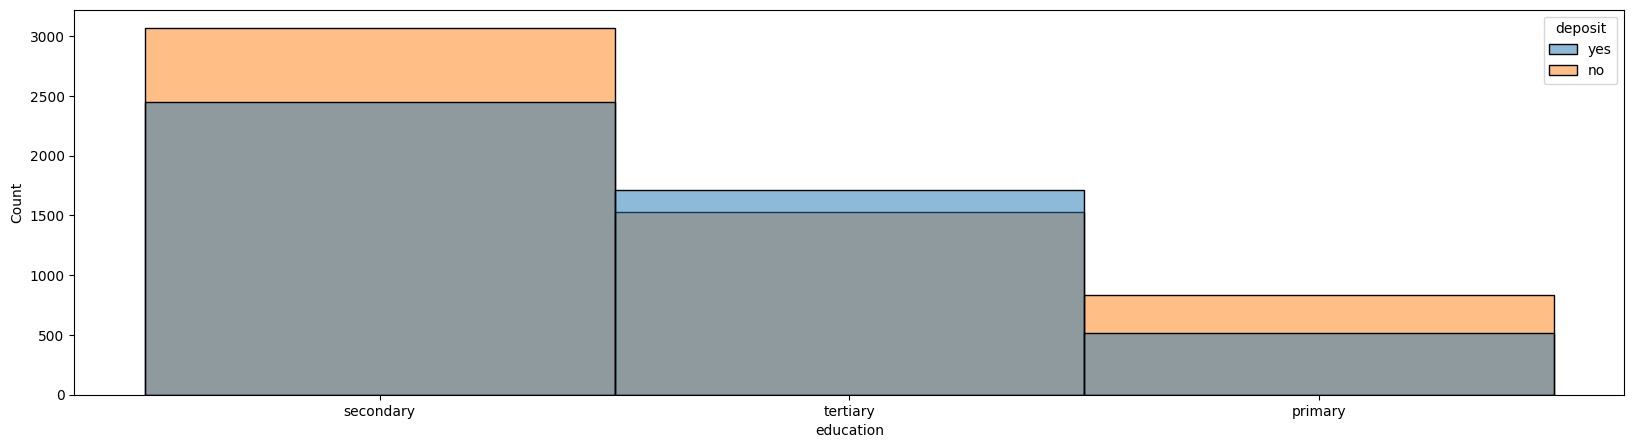

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
fig,ax=plt.subplots(figsize=(20,5))
sns.histplot(data=df,x="education",hue="deposit")

<Axes: xlabel='job', ylabel='Count'>

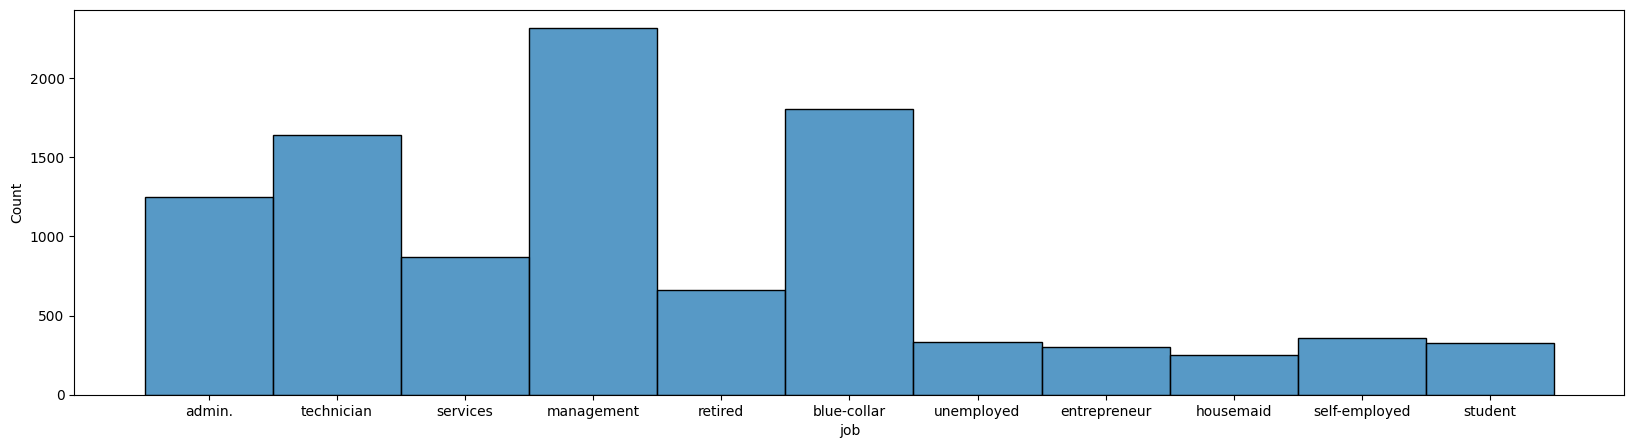

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
fig,ax=plt.subplots(figsize=(20,5))
sns.histplot(data=df,x="job")

### Задание 11

In [ ]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны

df_pivot_table=pd.pivot_table(df,
                              values='deposit',
                              index=["education"],
                              columns=["marital"],
                              aggfunc="count"
                              )


<Axes: xlabel='marital', ylabel='education'>

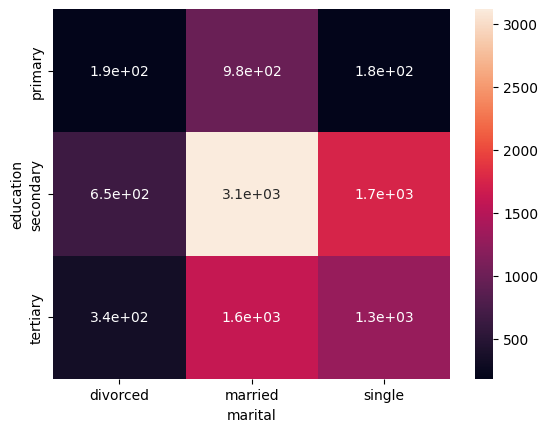

In [ ]:
sns.heatmap(df_pivot_table,annot=True)

## Часть 3: преобразование данных

### Задание 1

In [ ]:
# преобразуйте уровни образования
encoder_education=LabelEncoder()
encoder_education.fit(df["education"])
new_education=encoder_education.transform(df["education"])
df["education"]=new_education

In [ ]:
# преобразуйте возрастные группы
encoder_Group_Age=LabelEncoder()
encoder_Group_Age.fit(df["Group_Age"])
new_Group_Age=encoder_Group_Age.transform(df["Group_Age"])
df["Group_Age"]=new_Group_Age

### Задания 2 и 3

In [ ]:
# давайте перекодируем переменную deposit таким образом, чтобы вместо yes она принимала значение 1, а вместо no — 0.


encoder_deposit=LabelEncoder()
encoder_deposit.fit(df["deposit"])
new_deposit=encoder_deposit.transform(df["deposit"])
df["deposit"]=new_deposit

Сделаем то же самое для других бинарных переменных, которых у нас три:

'default';

'housing';

'loan'.

Все три мы будем модифицировать ровно так же: для слова yes мы возьмём в качестве значения 1, а для no — 0.

In [ ]:
# давайте перекодируем переменную default таким образом, чтобы вместо yes она принимала значение 1, а вместо no — 0.

new_default=encoder_deposit.transform(df["default"])
df["default"]=new_default

# давайте перекодируем переменную housing таким образом, чтобы вместо yes она принимала значение 1, а вместо no — 0.

new_housing=encoder_deposit.transform(df["housing"])
df["housing"]=new_housing

# давайте перекодируем переменную loan таким образом, чтобы вместо yes она принимала значение 1, а вместо no — 0.

new_loan=encoder_deposit.transform(df["loan"])
df["loan"]=new_loan

In [ ]:
# Вычислите среднее арифметическое для каждой из получившихся переменных, сложите три результата и в качестве ответа впишите итог, округлив его до трёх знаков после точки-разделителя.
df[["loan","housing","default"]].mean().sum()

0.6354280059376547

### Задание 4

Теперь нам необходимо преобразовать номинальные переменные, которые могут принимать несколько различных значений. Это следующие переменные:

'job';

'marital';

'contact';

'month';

'poutcome'.

Создайте для них dummy-переменные и добавьте их в набор данных.

In [ ]:
# создайте дамми-переменные
columns=['job','marital','contact','month','poutcome']
df=pd.get_dummies(df)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10105 entries, 0 to 11161
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10105 non-null  int64  
 1   education          10105 non-null  int64  
 2   default            10105 non-null  int64  
 3   balance            10105 non-null  float64
 4   housing            10105 non-null  int64  
 5   loan               10105 non-null  int64  
 6   day                10105 non-null  int64  
 7   duration           10105 non-null  int64  
 8   campaign           10105 non-null  int64  
 9   pdays              10105 non-null  int64  
 10  previous           10105 non-null  int64  
 11  deposit            10105 non-null  int64  
 12  Group_Age          10105 non-null  int64  
 13  job_admin.         10105 non-null  bool   
 14  job_blue-collar    10105 non-null  bool   
 15  job_entrepreneur   10105 non-null  bool   
 16  job_housemaid      10105 no

### Задания 5 и 6

Теперь давайте оценим мультиколлинеарность и взаимосвязь признаков с целевой переменной.

Для этого постройте матрицу корреляций. Дополните её тепловой картой, отражающей результат. Не забудьте, что для того, чтобы вычислить коэффициенты корреляции, необходимо, чтобы целевая переменная была числовой.

В качестве дополнения визуализации к этому заданию постройте столбчатую диаграмму для ранжированных коэффициентов корреляции.

<Axes: >

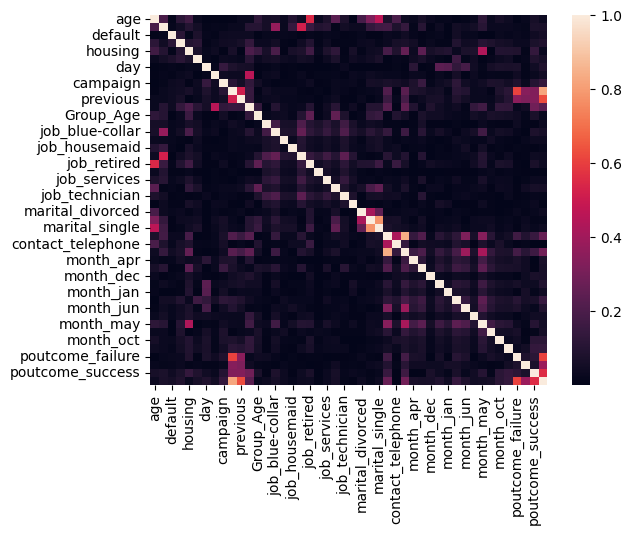

In [ ]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности

sns.heatmap(np.abs(df.corr())   )

In [ ]:
np.abs(df.corr())[["deposit"]].sort_values(by=["deposit"],ascending=[False])

,deposit
deposit,1.000000
duration,0.457818
poutcome_success,0.288491
contact_unknown,0.249294
poutcome_unknown,0.228300
contact_cellular,0.223944
housing,0.200290
month_may,0.168203
pdays,0.147917
previous,0.141102


In [ ]:

df_corr_deposit=np.abs(df.corr())[["deposit"]].sort_values(by=["deposit"],ascending=[False])



df_corr_deposit_best=df_corr_deposit[:5]

<Axes: xlabel='None', ylabel='deposit'>

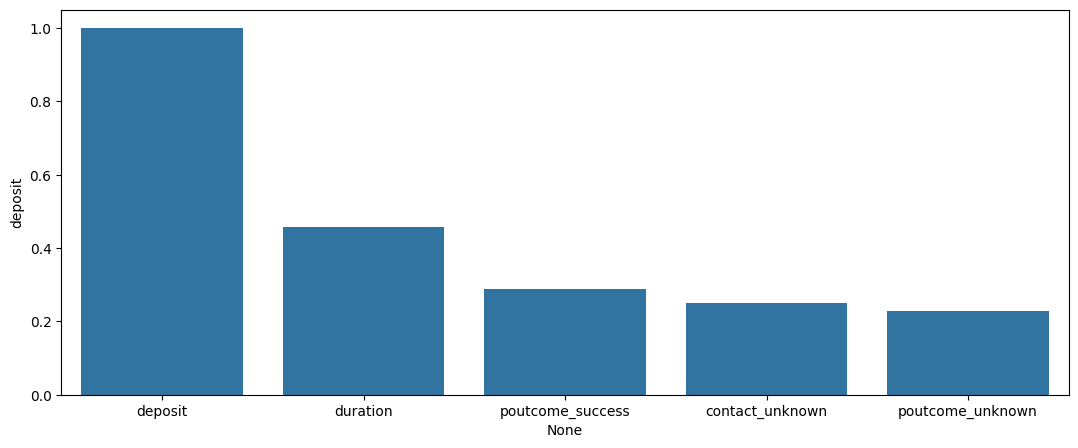

In [ ]:
fig,ax=plt.subplots(figsize=(13,5))
feature_corr=df_corr_deposit_best.index
values_corr=df_corr_deposit_best['deposit']

sns.barplot(x=feature_corr,y=values_corr,ax=ax)

In [ ]:
((np.abs(df.corr())>0.9) & (np.abs(df.corr())!=1)).sum()

,0
age,0
education,0
default,0
balance,0
housing,0
loan,0
day,0
duration,0
campaign,0
pdays,0


### Задания 7 и 8

In [ ]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [ ]:
# Каким получился размер тестовой выборки?
X_test

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3333,80,0,0,155.0,0,0,12,290,1,93,...,False,True,False,False,False,False,False,False,True,False
6048,55,1,0,512.0,0,0,28,70,1,-1,...,False,False,False,False,False,False,False,False,False,True
5675,39,1,0,1403.0,0,0,11,214,8,326,...,False,False,True,False,False,False,True,False,False,False
2564,32,2,0,1270.0,0,0,19,232,3,-1,...,False,False,False,False,False,False,False,False,False,True
8983,53,2,0,1074.0,1,0,15,523,2,-1,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,26,1,0,507.0,0,0,30,380,1,-1,...,False,False,False,False,False,False,False,False,False,True
9672,34,0,0,443.0,0,0,30,10,1,2,...,False,False,False,False,False,False,False,True,False,False
8584,39,1,0,-311.0,1,0,6,55,2,345,...,False,False,True,False,False,False,False,True,False,False
10972,28,1,0,250.0,0,1,29,133,1,-1,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Каково среднее значение целевой переменной на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.
y_test.mean()

0.46326836581709147

### Задание 9

In [ ]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков

selector=SelectKBest(f_classif,k=15)
selector.fit(X_train,y_train)


SelectKBest(k=15)

In [ ]:
columns=selector.get_feature_names_out()

In [ ]:
X_train=X_train[columns]
X_test=X_test[columns]

### Задание 10

In [ ]:
# нормализуйте данные с помощью minmaxsxaler

normalaser=preprocessing.MinMaxScaler()

normalaser.fit(X_train)

columns=X_train.columns

In [ ]:
X_train=normalaser.transform(X_train)
X_train=pd.DataFrame(X_train,columns=columns)

In [ ]:
X_test=normalaser.transform(X_test)
X_test=pd.DataFrame(X_test,columns=columns)

In [ ]:
X_test.iloc[:,0].mean()

0.46823674223097866

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [ ]:
# обучите логистическую регрессию и рассчитайте метрики качества

model_log_reg=linear_model.LogisticRegression(random_state=42,solver="sag",max_iter=1000)
model_log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='sag')

In [ ]:
y_pred_model_log_reg=model_log_reg.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test,y_pred_model_log_reg))

0.8047976011994002


### Задания 2,3,4

In [ ]:
# обучите решающие деревья, настройте максимальную глубину

model_tree=tree.DecisionTreeClassifier(random_state=42,criterion = 'entropy')
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_model_tree=model_tree.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_train,model_tree.predict(X_train)))

1.0


In [ ]:
print(metrics.accuracy_score(y_test,y_pred_model_tree))

0.7472263868065967


### Задание 5

In [ ]:
# переберём опримальныую глубину дерева
param_grid={"max_depth":[1,2,3,4,5,6,7,8,9,10]}
cv=5

In [ ]:
# подберите оптимальные параметры с помощью gridsearch

grid_search_1=GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42,criterion = 'entropy'),
    param_grid=param_grid,
    cv=cv,
    n_jobs=-1
)
# обучим
grid_search_1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
# Найдём значение метрики
grid_search_1.score(X_test,y_test)

0.8101949025487256

In [ ]:
# Найдём лучшую глубину дерева
grid_search_1.best_params_

{'max_depth': 9}

Разумеется, у каждой модели может быть множество параметров. Перебирать их вручную, чтобы получить наилучшее качество, долго и трудозатратно. Поэтому мы можем использовать оптимизацию: можно перебрать сразу большое количество комбинаций различных параметров и выбрать тот вариант, при котором модель будет давать наиболее точный прогноз.

Реализуйте оптимизацию гиперпараметров с помощью GridSearch, перебрав следующие параметры:

'min_samples_split': [2, 5, 7, 10];
'max_depth':[3,5,7].

In [ ]:
# переберём количество элементов в листе и глубину дерева
param_grid={'min_samples_split': [2, 5, 7, 10],
            'max_depth':[3,5,7]}
cv=5

In [ ]:
grid_search_2=GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=cv,
    n_jobs=-1
)
grid_search_2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 7, 10]})

In [ ]:
# Наёдем значение сетрики на тестовых данных
grid_search_2.score(X_test,y_test)

0.8137931034482758

In [ ]:
# Сделаем предсказание на тетовой выборке
y_pred_grid_search_2=grid_search_2.best_estimator_.predict(X_test)

In [ ]:
# наёдем значение метрики f1 на тетовой выборке
print(metrics.f1_score(y_test,y_pred_grid_search_2))

0.8015340364333653


In [ ]:
# наёдем значение метрики f1 на тренировачной  выборке
print(metrics.f1_score(y_train,grid_search_2.best_estimator_.predict(X_train)))

0.8243910205381308


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [ ]:
# Параметры для случайного леса
n_estimators = 100
criterion = 'gini'
min_samples_leaf = 5
max_depth = 10
random_state = 42

In [ ]:
# обучите на ваших данных случайный лес

model_randomForest=ensemble.RandomForestClassifier(
    n_estimators=n_estimators,
    criterion=criterion,
    min_samples_leaf=min_samples_leaf,
    max_depth=max_depth,
    random_state=random_state
)

In [ ]:
model_randomForest.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [ ]:
print(metrics.classification_report(y_test,model_randomForest.predict(X_test)))


print(metrics.f1_score(y_test,model_randomForest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335

0.8185279187817259


### Задания 2 и 3

In [ ]:
learning_rate = 0.05
n_estimators = 300
min_samples_leaf = 5
max_depth = 5
random_state = 42

In [ ]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
model_gd=ensemble.GradientBoostingClassifier(
    learning_rate=learning_rate,
    n_estimators =n_estimators ,
    min_samples_leaf=min_samples_leaf,
    max_depth=max_depth,
    random_state=random_state
)

In [ ]:
model_gd.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_leaf=5,
                           n_estimators=300, random_state=42)

In [ ]:
print(metrics.classification_report(y_test,model_gd.predict(X_test)))
print(metrics.f1_score(y_test,model_gd.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335

0.8167672276913306


Судя по результатам сильной разницы нет  в обоих случаях f1 примерно равна 0.83

### Задание 4

Вы уже попробовали построить разные модели, и теперь пришло время построить ансамбль из моделей разного типа.

В этом задании вам необходимо использовать стекинг, объединив те алгоритмы, которые вы уже использовали ранее: решающие деревья, логистическую регрессию и градиентный бустинг. В качестве метамодели используйте модель логистической регрессии.

Параметры оставьте те же, что были в ваших алгоритмах в предыдущих заданиях.

In [ ]:
# объедините уже известные вам алгоритмы с помощью стекинга
estimators_stek=[
    ("gb",ensemble.GradientBoostingClassifier(
    learning_rate=learning_rate,
    n_estimators =n_estimators ,
    min_samples_leaf=min_samples_leaf,
    max_depth=max_depth,
    random_state=random_state
)),
    ("tree",tree.DecisionTreeClassifier(random_state=42,criterion = 'entropy')),
    ("rG",linear_model.LogisticRegression(random_state=42,solver="sag",max_iter=1000))
]

In [ ]:
reg=StackingClassifier(
    estimators=estimators_stek,
    final_estimator=linear_model.LogisticRegression()
)

In [ ]:
reg.fit(X_train,y_train)

StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=5,
                                                           min_samples_leaf=5,
                                                           n_estimators=300,
                                                           random_state=42)),
                               ('tree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       random_state=42)),
                               ('rG',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42,
                                                   solver='sag'))],
                   final_estimator=LogisticRegression())

In [ ]:
print(metrics.precision_score(y_test,reg.predict(X_test)))

0.8069948186528497


### Задание 5

In [ ]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
selector=RFE(model_gd,n_features_to_select=3,step=1)
selector=selector.fit(X_train,y_train)

In [ ]:
selector.get_feature_names_out()

array(['balance', 'duration', 'poutcome_success'], dtype=object)

In [ ]:
selector.ranking_

array([ 1,  4,  1,  8,  3, 11,  5, 12,  2,  6,  9,  7, 10,  1, 13])

In [ ]:
X_train.columns

Index(['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'Group_Age', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [ ]:
for i, j in zip(selector.ranking_,X_train.columns):
  print (i,j)

1 balance
4 housing
1 duration
8 campaign
3 pdays
11 previous
5 Group_Age
12 contact_cellular
2 contact_unknown
6 month_mar
9 month_may
7 month_oct
10 month_sep
1 poutcome_success
13 poutcome_unknown


### Задания 6,7,8

In [ ]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna



In [ ]:
from sklearn import model_selection

In [ ]:
def optuna_rf(trial):
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  model=ensemble.RandomForestClassifier(
      n_estimators=n_estimators,
      max_depth=max_depth,
      min_samples_leaf=min_samples_leaf,
      random_state=42
      )

  # model.fit(X_train,y_train)
  # score=metrics.f1_score(y_train,model.predict(X_train))


  # model.fit(X_train,y_train)
  # score=metrics.f1_score(y_train,model.predict(X_train))

  skf=model_selection.StratifiedKFold(n_splits=3,shuffle=True,random_state=42)

  cv_metrics=model_selection.cross_validate(
      estimator= model,
      X=X_train,
      y=y_train,
      cv=skf,
      scoring='f1',
      return_train_score=True
  )
  score=np.mean(cv_metrics["test_score"])


  return score

In [ ]:
# Проведём максимизацию
study=optuna.create_study(study_name="RandomForestClassifier",direction="maximize")

study.optimize(optuna_rf,n_trials=20)

[I 2025-02-21 03:06:22,493] A new study created in memory with name: RandomForestClassifier
[I 2025-02-21 03:06:25,498] Trial 0 finished with value: 0.822208962141043 and parameters: {'n_estimators': 193, 'max_depth': 19, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.822208962141043.
[I 2025-02-21 03:06:28,047] Trial 1 finished with value: 0.8222960237116593 and parameters: {'n_estimators': 170, 'max_depth': 19, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.8222960237116593.
[I 2025-02-21 03:06:29,959] Trial 2 finished with value: 0.8218898615887257 and parameters: {'n_estimators': 134, 'max_depth': 10, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.8222960237116593.
[I 2025-02-21 03:06:33,573] Trial 3 finished with value: 0.8196310129728195 and parameters: {'n_estimators': 139, 'max_depth': 19, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.8222960237116593.
[I 2025-02-21 03:06:38,208] Trial 4 finished with value: 0.8213344632580842 and parameters: {'n_es

In [ ]:
# Обучим модель с лучшими параметрами
model=ensemble.RandomForestClassifier(
      n_estimators=study.best_params["n_estimators"],
      max_depth=study.best_params["max_depth"],
      min_samples_leaf=study.best_params["min_samples_leaf"],
      random_state=42
      )

model.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=2, n_estimators=160,
                       random_state=42)

In [ ]:
# Введите значение метрики f1 на тестовой выборке.
print(metrics.f1_score(y_test,model.predict(X_test)))

0.8169727675744142


In [ ]:
# Введите значение метрики accuracy на тестовой выборке.
print(metrics.accuracy_score(y_test,model.predict(X_test)))

0.8266866566716642
